In [166]:
import os,sys
from urllib.parse import urlparse
import random
import langid
import re
import ast
import concurrent
import htmldate
import time
import string
import uuid

In [10]:
base_path = "/media/ruben/Data Drive/react-data/protest"
photo = "deniz"
num_iterations = 4
range_iter = range(1,num_iterations+1)

In [73]:
list_url = []
list_combi = []
for n in range_iter:
    with open(os.path.join(base_path,photo,photo+'_'+str(n),"html",'results.txt')) as f:
        urls = f.readlines()
        urls = [u.split('|') for u in urls]
        urls = [[u[0],u[1].replace('\n','')] for u in urls]
        list_url = list_url + urls
        list_combi = list_combi + urls

In [27]:
## Top Top Level Domains

tlds = [urlparse(i[1])[1] for i in list_url]
for k,v in Counter(tlds).most_common(25):
    print(k,v)

twitter.com 245
www.hepsiburada.com 202
www.youtube.com 138
www.facebook.com 137
www.tablodenizi.com 133
www.pinterest.com 118
gramho.com 81
www.cnnturk.com 78
t24.com.tr 75
www.twipu.com 61
urun.n11.com 54
www.hurriyet.com.tr 52
www.wattpad.com 48
www.incisozluk.com.tr 45
www.picuki.com 43
www.ntv.com.tr 42
www.dailymotion.com 41
www.sondakika.com 41
www.milliyet.com.tr 40
www.sanalbasin.com 40
www.pictame.com 38
www.haberler.com 36
onedio.com 32
www.posta.com.tr 28
www.mynet.com 28


In [1]:
## Language Proportion (pie chart)

In [28]:
with open(os.path.join(base_path,photo,"languages.json")) as fp:
    js = json.load(fp)

In [66]:
dfl = pd.DataFrame()
for k,v in js.items():
    
    list_lang = list(set([v[0] for k,v in v.items()]))
    
    for lang in list_lang:
        num = len([v for k,v in v.items() if v[0] == lang])
        dfl = dfl.append(pd.DataFrame([lang,num]).T)
dfl.columns = ['lang','count']
dfl = dfl.groupby('lang').sum().reset_index()
dfl = dfl[dfl['count'] > 5]
dfl.index = dfl['lang']
dfl = dfl.drop('lang', 1)

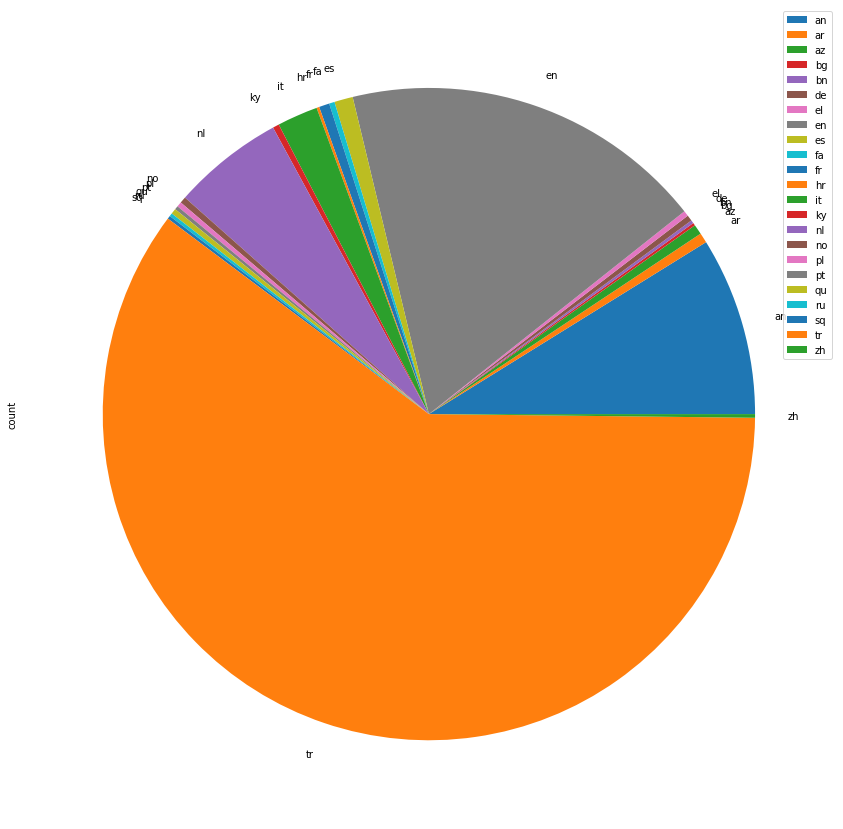

In [69]:
plot = dfl.plot.pie(y='count',x='lang', figsize=(15, 15))
plot

In [80]:
list_specific = [[k.split('/')[-1][:-5] for k,v in v1.items() if v[0] == "an"] for k1,v1 in js.items()]
list_specific = [item for sublist in list_specific for item in sublist]
list_specific = [el[1] for el in list_combi if el[0].split('/')[-1] in list_specific]
list_specific

['http://www.sanalbasin.com/3939deniz-gezmis-idamdan-sonra-52-dakika-yasadi3939-13867953',
 'https://www.picomico.com/tag/DEN%C4%B0ZGEZM%C4%B0S?lang=ja',
 'https://www.picomico.com/tag/DEN%C4%B0ZGEZM%C4%B0S',
 'http://www.cheapmichaelkorswalletssale.com/hidden_harveyville/deniz-gezmi%C5%9F-mont',
 'http://www.soymocano54.com/littleport_rodman/deniz-gezmi%C5%9F-style-parka-mont-erkek-kaban-k%C3%BCrkl%C3%BC-ye%C5%9Fil',
 'http://www.cheapmichaelkorswalletssale.com/jonesville_bressler/deniz-gezmi%C5%9F-parkas%C4%B1-bayan',
 'https://www.kimdirki.com/wp-content/uploads/2018/03/?SD',
 'https://www.kimdirki.com/wp-content/uploads/2018/03/?SA',
 'https://www.kimdirki.com/wp-content/uploads/2018/03/?DD',
 'http://www.sanalbasin.com/iyi-ki-dogdun-deniz-agabey-23843652',
 'https://www.sabah.com.tr/kultur-sanat/haber-arsivi?baslik=true&metin=true&yazarlar=true&firstlevelcategorylist=6e6655a8-cdbe-4fb0-b4f3-f167ee450031&sort=rank&reverse=false&etiket=1&totalcount=15078&isencoded=true&categorytype=

In [220]:
## Top Terms

def clean_and_split_str(txt):
    #strip_special_chars = re.compile("[^A-Za-z0-9#]+")
    translator = str.maketrans('', '', string.punctuation)
    txt = txt.translate(translator)
    txt = re.sub('\s+', ' ', txt).strip()
    txt = txt.lower()
    return txt

turk_ids = []

for it,dict1 in js.items():
    for fn,results in dict1.items():
        if results[0] == "tr":
            turk_ids.append(fn.split('/')[-1][:-5])

In [223]:
arts = []

for n in range_iter:
    fn = os.path.join(base_path,photo,photo+'_'+str(n),"txt",'parsed_text.csv')
    fn = pd.read_csv(fn)
    for c,t in enumerate(fn['text']):
        id_ = fn['id'][c].split('html/')[1].split('.')[0]
        if id_ in turk_ids:
            t = str(t)
            t = t[1:-1].split('\n')
            t = " ".join([clean_and_split_str(x) for x in t if x])
            arts.append(t)

In [227]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

    
count_vectorizer = CountVectorizer() # Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(arts)# Visualise the 10 most common words

In [229]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 8
number_words = 25# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
ve bir bu de da için çok ile nihat olarak olan ne doğan daha ama gibi en türkiye sonra kadar her var ki ın son

Topic #1:
ve bir kanvas tablo tüm için en bu tablolar ile olarak 100 tabloları ahşap yer olan oldukça veya gibi madde kumaşlar uygun çok tarafından sanatsal

Topic #2:
ve bir deniz bu gezmiş da için de ile gibi olduğunu olarak olan ne erdoğan gezmişin her dedi kadar daha gün mhp söyledi ilgili bahçeli

Topic #3:
ve bir ile gezmiş deniz her da de akkaş gün stanbul in muammer olarak idam gelsin kadar aralık savcı cumhuriyet bugün saklıdır 2020 hüseyin doğan

Topic #4:
ve bir denizgezmiş devrim devrimci mahirçayan yusufaslan sosyalizm cheguevara fidelcastro komünizm hüseyininan bu sol sosyalist karlmarx ahmetkaya solcu yılmazgüney ulaşbardakçı komünist küba atatürk için özgürlük

Topic #5:
ve bir bu da olarak de alarm fiyatä ile taksit tl için fiyatına peşin en ya na sonra nä gã¼n sã¼resi altä üzerine 15 gibi

Topic #6:
ve deniz gezmiş bir de bu 

In [91]:
## Diachronic

In [187]:
with open(os.path.join(base_path,photo,'dates.txt')) as f:
    dates = f.readlines()
    dates = [d.split('|') for d in dates]
    dates = [[u[0],u[1].replace('\n','')] for u in dates]
    dates = [u for u in dates if u[1] != "na" and "ERROR" not in u[1] and "gramho" not in u[0] and "picuki" not in u[0] and "gittigidiyor" not in u[0]]
    dates_original = dates

In [189]:
dates = pd.DataFrame(list([u[1] for u in dates]),columns=['date'])
dates['y'] = dates['date'].str[0:4]
dates['m'] = dates['date'].str[5:7]
dates['d'] = dates['date'].str[8:]
dates['c'] = 1

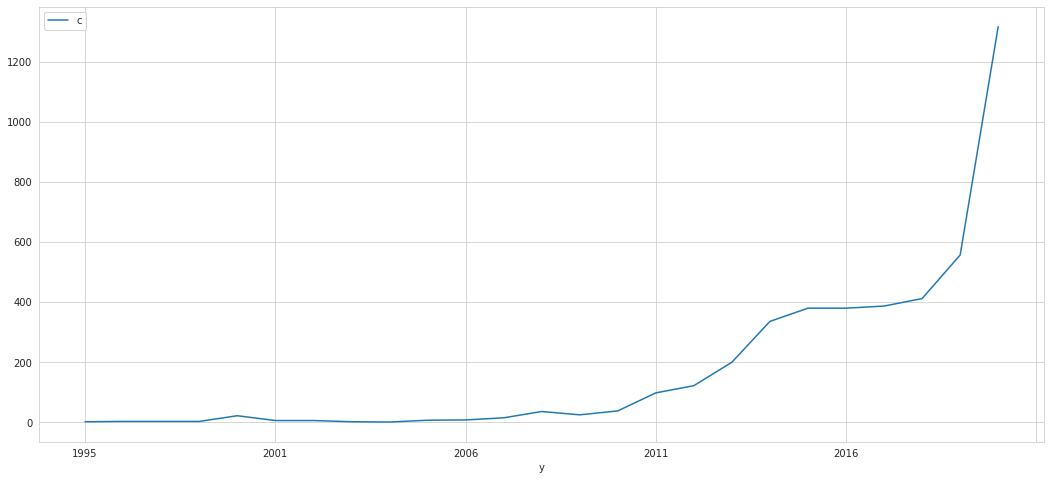

In [234]:
months = dates[['y','c']].groupby('y').sum().reset_index()
months.plot(x='y',y='c',figsize=(18,8))

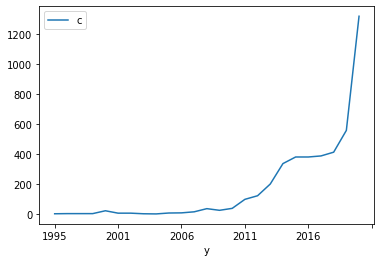